In [4]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 4.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.7 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 4.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.8 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 4.0 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 4.2 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.0 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols

In [6]:
all_merged_no118 = pd.read_csv("C:\\Users\\Sol Joaquin\\Documents\\GitHub\\Coffeeoffers\\all_merged_no118.csv")

In [7]:
customers_no118_edit = pd.read_csv("C:\\Users\\Sol Joaquin\\Documents\\GitHub\\Coffeeoffers\\customers_no118_edit.csv")


In [8]:
all_merged_no118.columns

Index(['customer_id', 'event', 'time', 'offer id', 'amount',
       'completed offer id', 'given reward', 'transactbeforeoffer',
       'time(days)', 'rounded day', 'became_member_on', 'gender', 'age',
       'income', 'date', 'year', 'month', 'offer_id_y', 'offer_type',
       'difficulty', 'assoc. reward', 'duration', 'channels', 'complete offer',
       'channel 1', 'channel 2', 'channel 3', 'channel 4', 'helper (social)'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of amount')

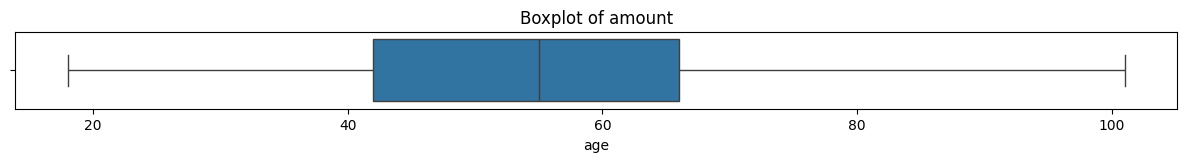

In [9]:
plt.figure(figsize = (15,1))
sns.boxplot(x=customers_no118_edit['age'], fliersize=1)
plt.title('Boxplot of amount')

Text(0.5, 1.0, 'Histogram of rounded day')

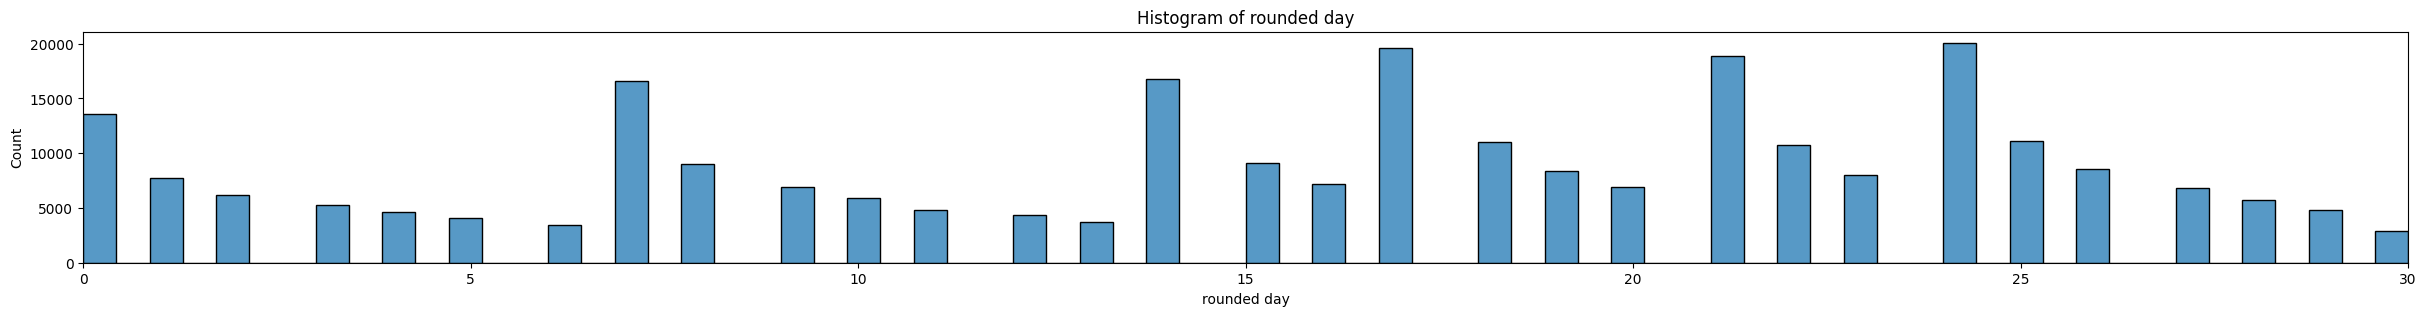

In [10]:
plt.figure(figsize=(30,3))
sns.histplot(x=all_merged_no118['rounded day'])
plt.xlim(0, 30)
plt.title('Histogram of rounded day')


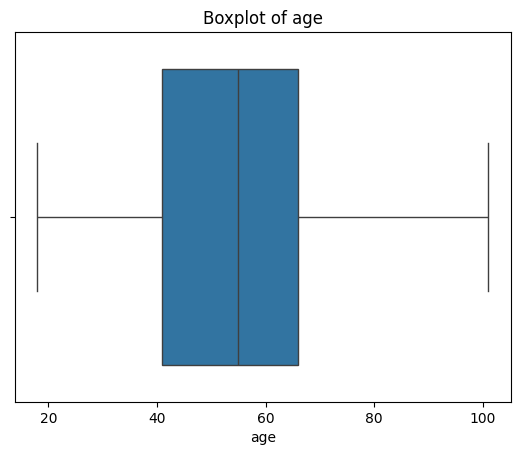

In [11]:
def boxplot_maker(x):
    sns.boxplot(x=all_merged_no118[x], fliersize=1)
    plt.title('Boxplot of ' + x)
    plt.show()

columns = 'age'
boxplot_maker(columns)


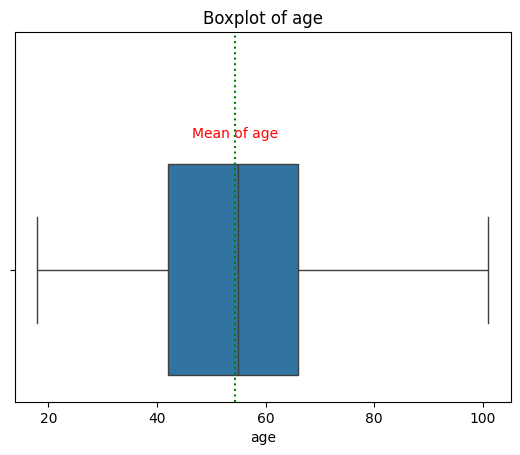

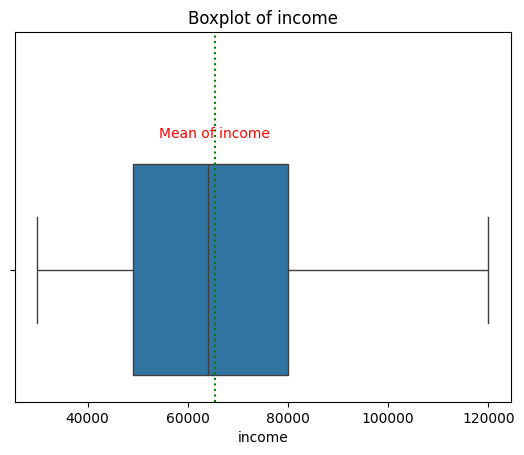

In [12]:
def boxplot_maker(columns):
    for i in columns:
        plt.figure()
        sns.boxplot(x=customers_no118_edit[i], fliersize=1)
        median = customers_no118_edit[i].median()
        mean = customers_no118_edit[i].mean()
        #plt.axvline(median, color = 'red', linestyle = '--')
        plt.axvline(mean, color = 'green', linestyle = ':')
        #plt.annotate('median',xy = (median,0),arrowprops=dict(arrowstyle = '->', color = 'red', lw = 1.5), color = 'red', fontsize = 8)
        plt.text(
            mean,
            0.5,               # Y position high above boxplot
            f'Mean of {i}',
            ha='center',
            color='red',
            fontsize=10
        )
        plt.ylim(-0.5,0.9)
        plt.title(f'Boxplot of {i}')
        plt.show()
    #plt.title('Boxplot of ' + x)
    #plt.show()

columns = ['age', 'income']
boxplot_maker(columns)

In [13]:
customers_no118_edit.head()

customer_id  became_member_on gender  age    income  \
0  0610b486422d4921ae7d2bf64640c50b          20170715      F   55  112000.0   
1  78afa995795e4d85b5d9ceeca43f5fef          20170509      F   75  100000.0   
2  e2127556f4f64592b11af22de27a7932          20180426      M   68   70000.0   
3  389bc3fa690240e798340f5a15918d5c          20180209      M   65   53000.0   
4  2eeac8d8feae4a8cad5a6af0499a211d          20171111      M   58   51000.0   

         date  year  month  total amount transacted  offer completed  \
0  2017-07-15  2017      7                    77.01                1   
1  2017-05-09  2017      5                   159.27                3   
2  2018-04-26  2018      4                    57.73                2   
3  2018-02-09  2018      2                    36.43                5   
4  2017-11-11  2017     11                    15.62                1   

   offer received  offer viewed  number of transactions  total events  \
0               2             0                       3             6   
1               4             4                       7            18   
2               4             3                       3            12   
3               6             6                       3            20   
4               3             2                       4            10   

   transaction before completed offer  
0                               23.22  
1                               41.61  
2                               18.42  
3                               36.43  
4                                7.14

In [14]:
all_merged_no118.columns

Index(['customer_id', 'event', 'time', 'offer id', 'amount',
       'completed offer id', 'given reward', 'transactbeforeoffer',
       'time(days)', 'rounded day', 'became_member_on', 'gender', 'age',
       'income', 'date', 'year', 'month', 'offer_id_y', 'offer_type',
       'difficulty', 'assoc. reward', 'duration', 'channels', 'complete offer',
       'channel 1', 'channel 2', 'channel 3', 'channel 4', 'helper (social)'],
      dtype='object')

Text(0.5, 1.0, 'Bar plot of total events')

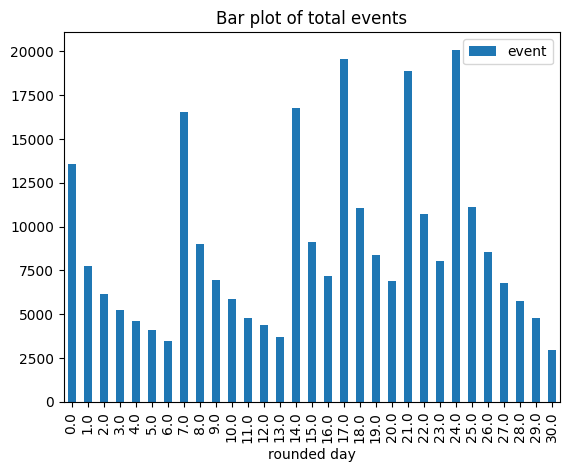

In [15]:
x = all_merged_no118[['event','rounded day']].groupby('rounded day').count()
x
x.plot(kind = 'bar')
plt.title(f'Bar plot of total events')


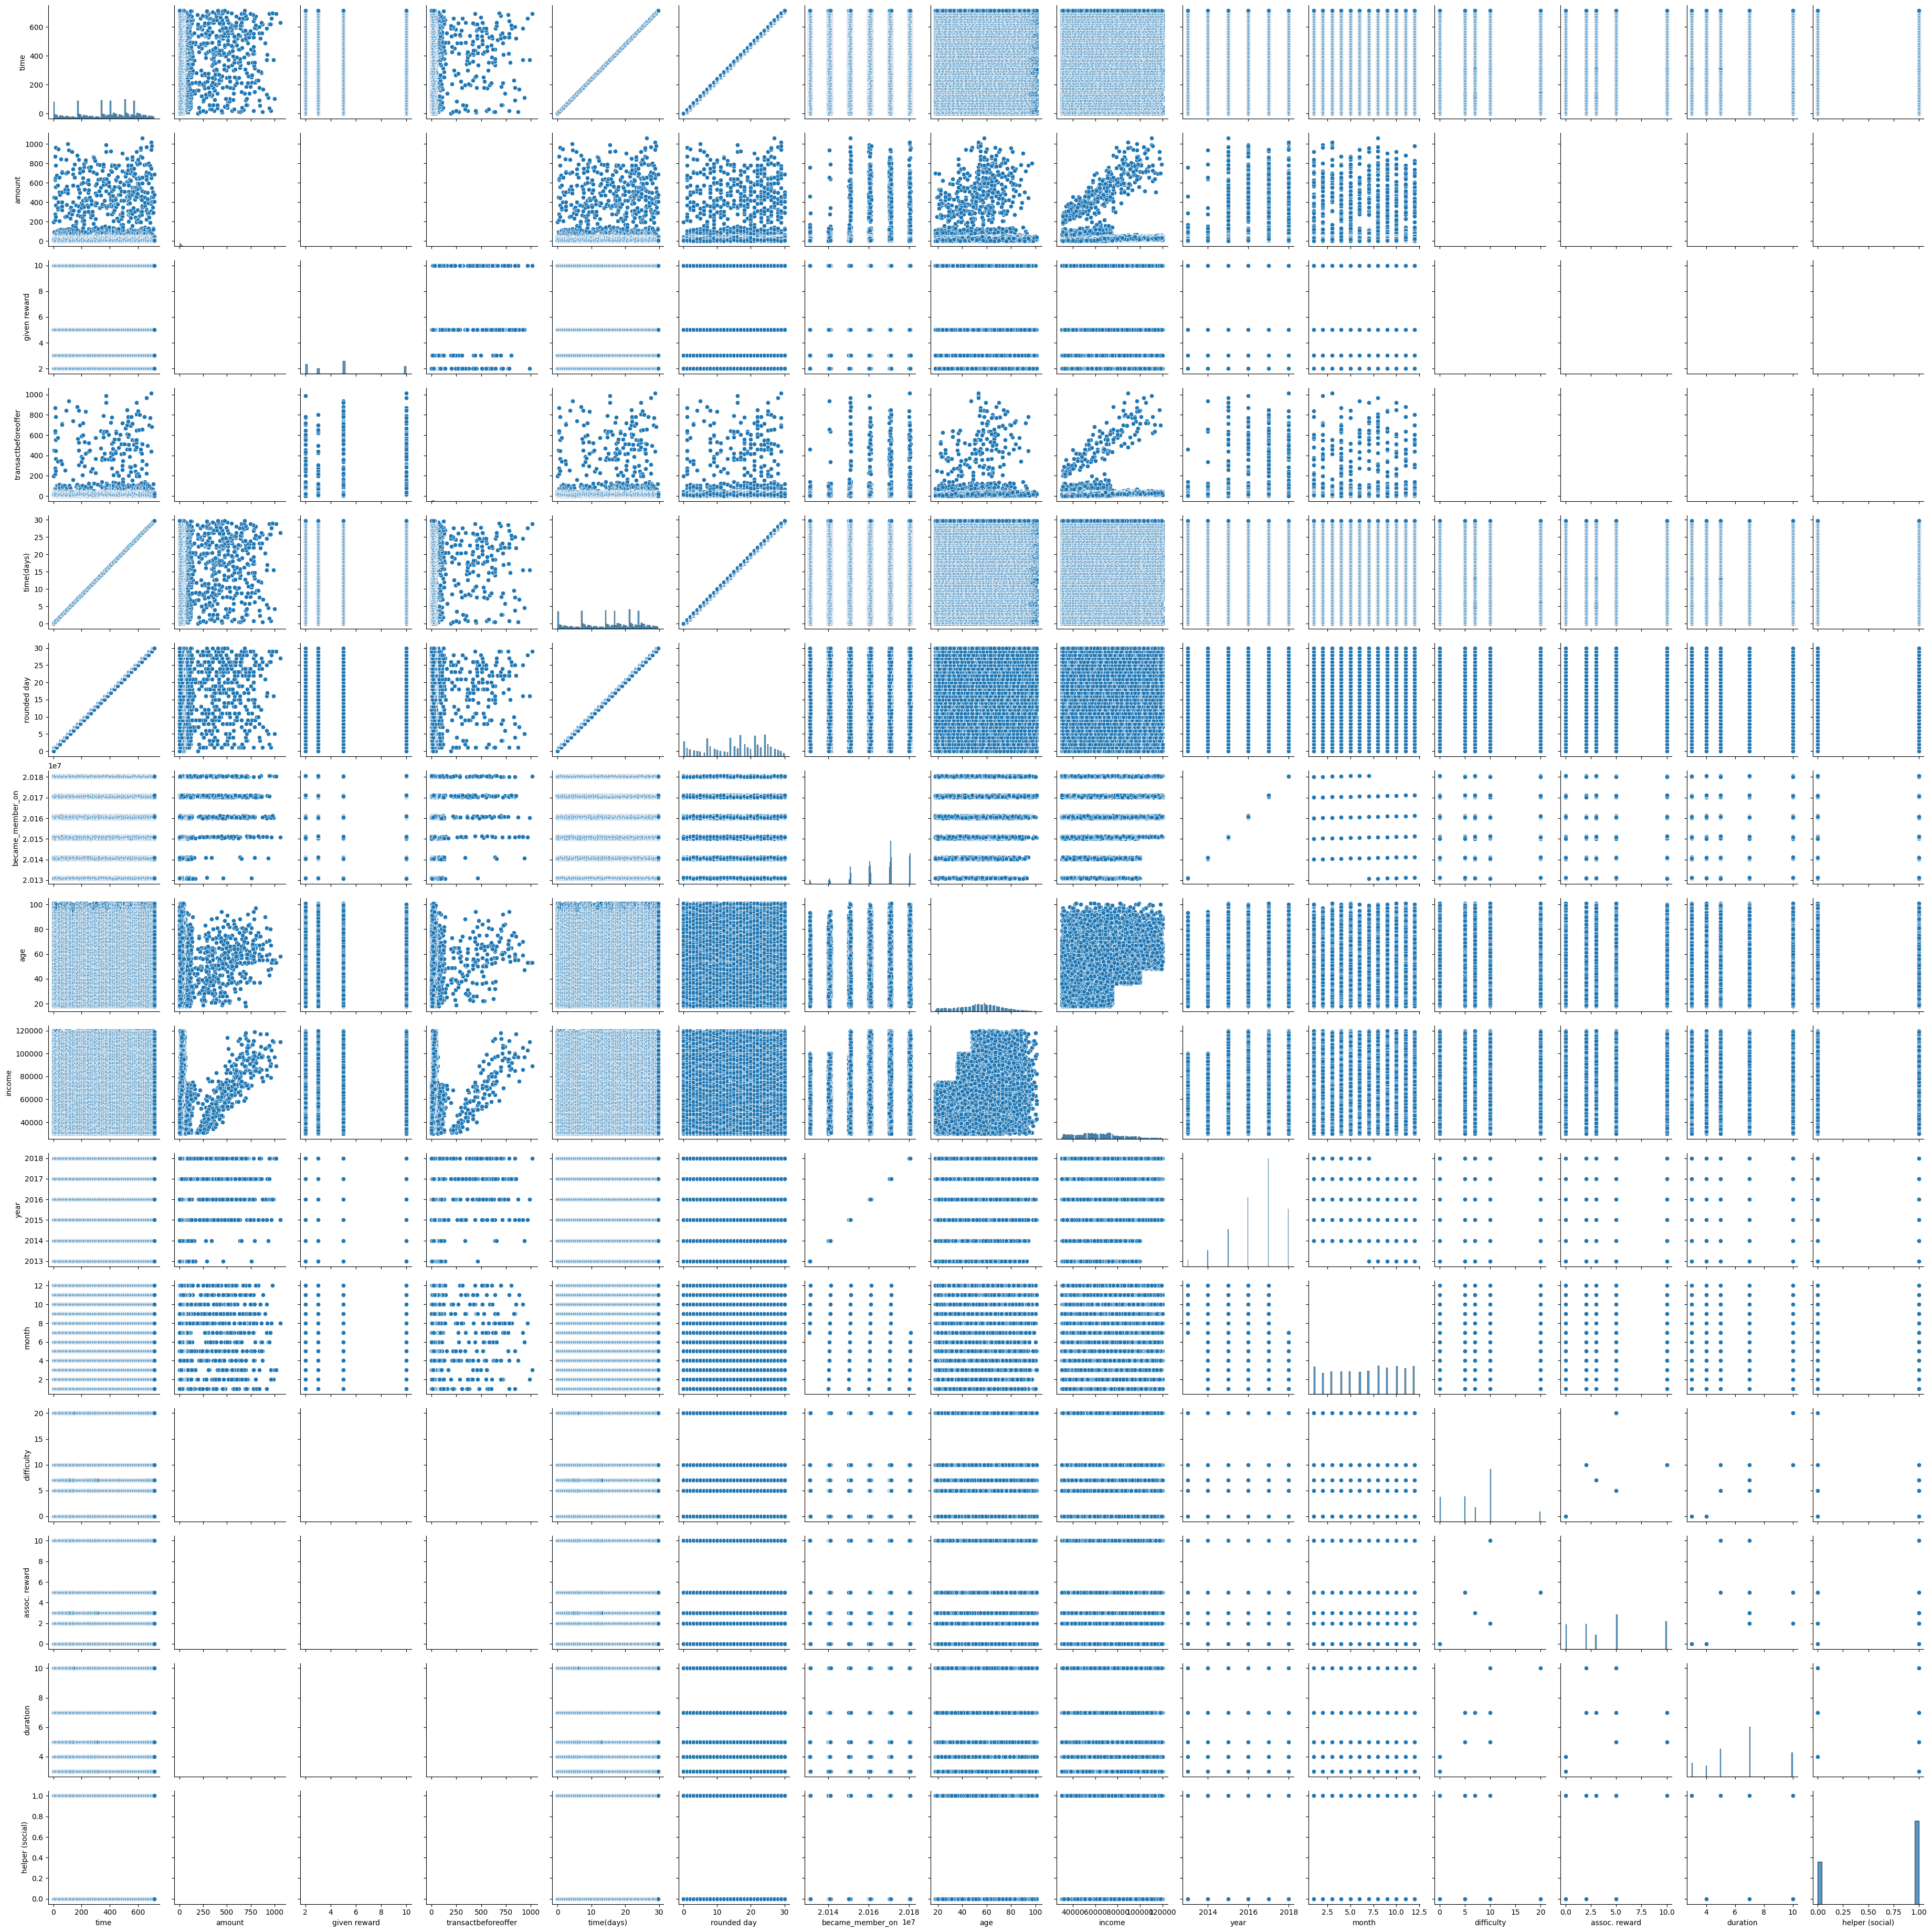

In [16]:
sns.pairplot(all_merged_no118)

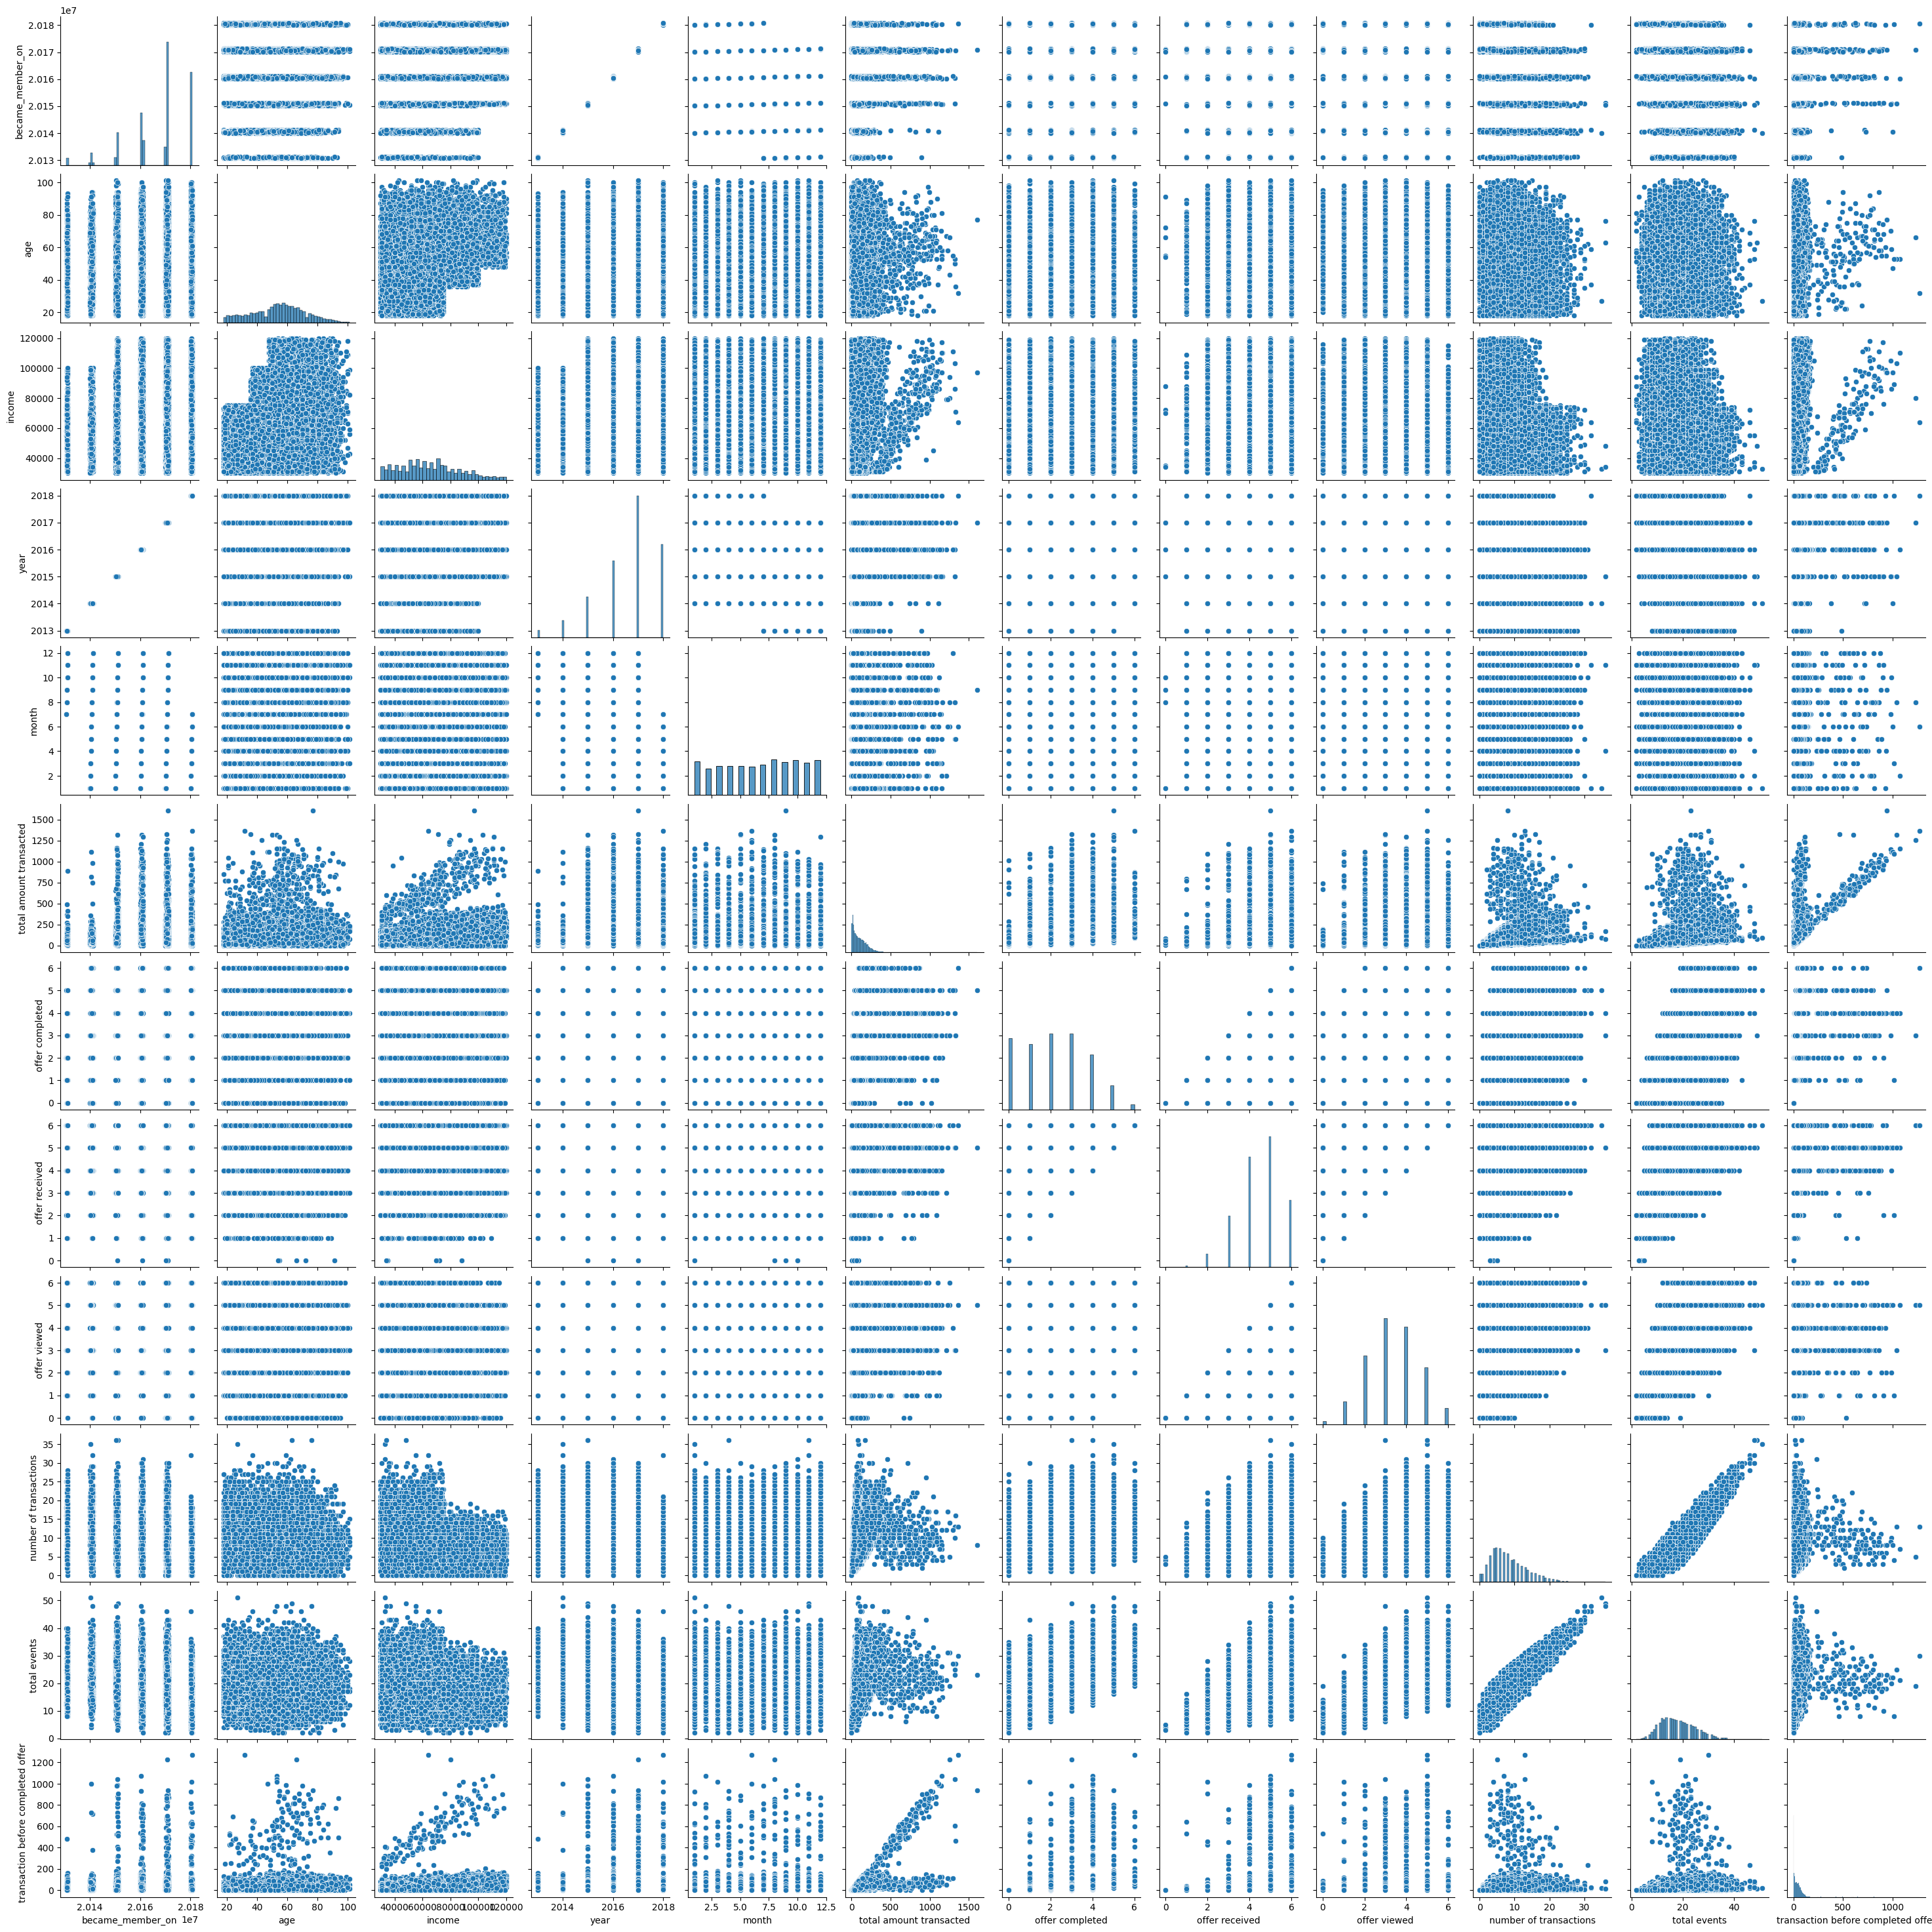

In [17]:
sns.pairplot(customers_no118_edit)

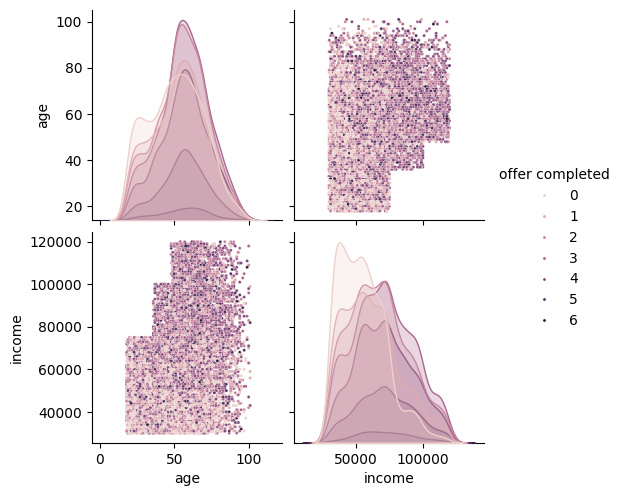

In [31]:
sns.pairplot(data=customers_no118_edit, vars=['age', 'income'], hue='offer completed', plot_kws={'s':5})
